In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
import scipy
import math
from matplotlib import animation
import seaborn as sb

In [2]:
# Initial conditions for Case 1 and exact solution
dir0 = 0.0  # u(-L,t)= dir0
dir1 = 0.0  # u(L,t)= dir1

# function for setting initial conditions in space
def I(x): # initial u(x,0)
    result = []
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for x_i in x:
        i_x = norm.pdf(x_i, 0, 1/(2**2))
        result.append(i_x)
    return result


#Note - I'm assuming D=1
def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = norm.pdf(x,0,1/(2**2))
    else:
        y = x - v*t
        u_ex = np.exp(-y**2/(4*t))/np.sqrt(4*np.pi*t)
        u_ex[0] = dir0
        u_ex[M-1] = dir1
    return u_ex

## Using the normally distributed wind speeds

In [3]:
# Defining the wind speed function
#def wind_speed(shape, scale):
    # using a weibull with parameter k as an example, we can change it when we have data
#    return np.random.weibull(shape)*scale


# setting the distributions to be equal to those given in the wind_distribution file.
x_mean = 2.0046153468353722
x_std = 2.168835495560843

y_mean = 1.0209864186943514*np.exp(-16)
y_std = 2.901290755064771


def wind_speed(mean, std):
    # using a weibull with parameter k as an example, we can change it when we have data
    return np.random.normal(loc = mean, scale = std)

In [4]:
## ====== setting parameters =======
Nt_gaps = 2**10  # number of timesteps
L = 2**5 # final distance
T = 1  # final time 
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2**8; # number of spaces in x direction
Nx_points = Nx_spaces + 1 
x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
dx = x_pde[1] - x_pde[0] 
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
C = dt/(dx**2)
v = 15
B = v*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)


##----------intialise lists ------------------------
# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition
U[:,0]=I(x_pde)
# enforcing the boundary condition
U[-L,:]  = dir0 
U[L,:] = dir1

Delta x = 0.25 Delta t =  0.0009765625 C = 0.015625


In [5]:
x_ex = np.linspace(-L, L, Nx_points)
def plotting(U,L,type):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colours1 = ['b','purple','yellow','r','g',]
    colour_pos = 0;



# some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:
        if type == "exact":
            U_tplot = U_exact(x_ex,t[plot_pos])
            label = "Exact, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_ex,U_tplot,linestyle = ':',color = colours[colour_pos],marker = ".",markersize = 1, label=label)
            colour_pos = colour_pos + 1;
    # numerical solution
        else:
            label = "Numerical PDE, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
            colour_pos = colour_pos + 1;

    plt.xlim(-L,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

In [6]:
# u_old = I(x_pde)
#
# u = np.zeros(Nx_points)
# # and to store the full solution
# U = np.zeros((Nx_points,Nt_points))
# U[:,0] = u_old
# for n in range(1, Nt_points):
#     # set Dirichlet boundary points here
#     #...
#     # compute u at inner mesh points
#     for i in range(1, Nx_points-1):
#         u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])
#
#     # update u_old before next step
#     u_old[:]= u
#
#     # copy into full storage
#     U[:,n] = u;
# print(U.shape)
# plotting(U,L, "exact")
# plotting(U,L, "numerical")

In [7]:
#Note - I'm assuming D=1
#def U_exact(x,t):
#    M = np.size(x)
#    u_ex = np.zeros(M)
#    for x_i in x:
#        if t == 0:
#            x_i = norm.pdf(x[i], 0, 1/(2**12))
#    else:
#        x_i = 1/(2*np.pi*t)*np.exp(-x**2/(4*t))
#    return u_ex

# Extending to 2D

In [22]:
# ====== setting parameters =======
Nt_gaps = 2**12  # number of timesteps
Lx = 4  # final distance in x
Ly = 4  # final distance in y
T = 1  # final time
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2**5; # number of spaces in x direction
Nx_points = Nx_spaces + 1
Ny_points = Nx_points

x_pde = np.linspace(-Lx, Ly, Nx_points)
y_pde = np.linspace(-Lx, Ly, Ny_points)

dx = x_pde[1] - x_pde[0]
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
C = dt/(dx**2)
#vx = 5
#vy = 5
#Bx = vx*dt/(2*dx)
#By = vy*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)


Delta x = 0.25 Delta t =  0.000244140625 C = 0.00390625


In [23]:
# Note - how do we justify choice of covariance?
dist = multivariate_normal(mean=[0,0], cov=[[1/(1000),0],[0,1/(1000)]])

# function for setting initial conditions in 2D space
def I(x, y): # initial u(x,0):
    result = np.zeros((Nx_points, Ny_points))
    i = 0
    for x_i in x:
        j = 0
        for y_i in y:
            xy = dist.pdf([x_i,y_i])
            result[i][j] = xy
            j +=1
        i +=1
    return result





In [24]:
U =  np.zeros((Nt_points,Nx_points,Ny_points))
u = np.zeros((Nx_points, Ny_points))
u_old = I(x_pde,y_pde)
U[0,:,:] = u_old

# enforcing the boundary condition
U[:,-Lx,:]  = dir0
U[:,Lx,:] = dir1

U[:,:,-Ly] = dir0
U[:,:,Ly] = dir1


for n in range(1, Nt_points):
    # set Dirichlet boundary points here
    #...
    # compute u at inner mesh points
    for i in range(1, Nx_points-1):
        for j in range(1,Nx_points -1):

            # draw independent random samples for our distribution for wind speed
            Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
            By = wind_speed(y_mean, y_std)*dt/(2*dx)

            u[i][j] = (1-4*C)*u_old[i][j] + (C+Bx)*(u_old[i-1][j]) + (C-Bx)*(u_old[i+1][j]) +  (C+By)*(u_old[i][j-1]) + (C-By)*(u_old[i][j+1])


    # update u_old before next step
    u_old[:]= u

    # copy into full storage
    U[n,:,:] = u;


[0.         0.00519253 0.01130438 0.01895053 0.02947188 0.04218853
 0.05916472 0.07944112 0.10468425 0.13259759 0.16186788 0.19148491
 0.22081933 0.24680333 0.26808039 0.28092431 0.28479981 0.28059181
 0.26810941 0.24734515 0.2225563  0.19389117 0.16322486 0.13228471
 0.10561308 0.08015899 0.05899762 0.04261382 0.02956853 0.01939725
 0.01141082 0.00523246 0.        ]
[0.00000000e+00 1.03611085e-04 2.85297165e-04 6.24937412e-04
 1.24513246e-03 2.41051824e-03 4.38404143e-03 7.52864576e-03
 1.30004635e-02 2.14456739e-02 3.41825678e-02 5.26871117e-02
 7.80950192e-02 1.12585783e-01 1.59107943e-01 2.17237523e-01
 2.84799814e-01 3.61429980e-01 4.46144365e-01 5.32506617e-01
 6.14537365e-01 6.84890107e-01 7.39640794e-01 7.73697154e-01
 7.84499849e-01 7.70343357e-01 7.32167646e-01 6.72416494e-01
 5.94784557e-01 4.97980966e-01 3.80556199e-01 2.29301158e-01
 0.00000000e+00]


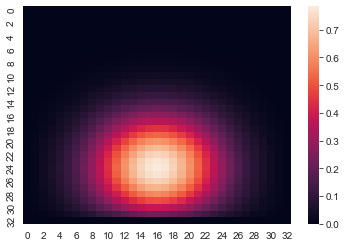

In [25]:
sb.heatmap(U[-1])
print(U[-1,16,:])
print(U[-1,:,16])
# the second has bigger values although they start off smaller. So this is actually y = 16 but seaborn is transposing the plot!

MovieWriter ffmpeg unavailable; using Pillow instead.


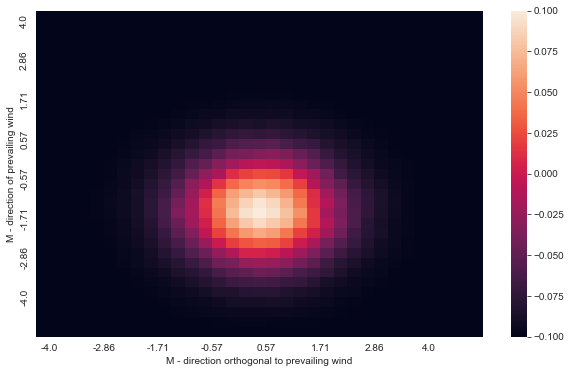

In [57]:
import seaborn as sb
import matplotlib.animation as animation

fig = plt.figure(figsize=(10,6))

n_xticks = 2**3
x_ticks = np.linspace(-Lx, Lx, n_xticks)
y_ticks = np.linspace(Ly, -Ly, n_xticks)
def animate(i):
    data = U[i]
    step = int((len(data) -1)/n_xticks)
    if i == 0:
        p = sb.heatmap(data, cbar = False, annot = False)
        p.set_xticks(range(1,len(data),step))
        p.set_xticklabels(x_ticks.round(2))
        p.set_yticks(range(1,len(data),step))
        p.set_yticklabels(y_ticks.round(2))
        p.set(xlabel = "M - direction orthogonal to prevailing wind")
        p.set(ylabel = "M - direction of prevailing wind")
    else:
        p = sb.heatmap(data, cbar = False, annot = False)
        p.set_xticks(range(1,len(data),step))
        p.set_xticklabels(x_ticks.round(2))
        p.set_yticks(range(1,len(data),step))
        p.set_yticklabels(y_ticks.round(2))
        p.set(xlabel = "M - direction orthogonal to prevailing wind")
        p.set(ylabel = "M - direction of prevailing wind")

def init():
    p = sb.heatmap(np.zeros((Nx_points,Nx_points)), cbar=True)

ani = animation.FuncAnimation(fig, animate,init_func = init, frames=64,interval=70,repeat=True)

ani.save('animation.gif')

Wind speeds vs concentration (at 10 units away), in the direction of prevailing
wind

In [38]:
def sim(x_mean,y_mean, Nt_gaps):
    Lx = 4  # final distance in x
    Ly = 4  # final distance in y
    T = 1  # final time
    Nt_points = Nt_gaps + 1
    h = T/(Nt_points)  # time step

    t = np.linspace(0.,T,Nt_points)  # times at each time step
    Nx_spaces = 2**5; # number of spaces in x direction
    Nx_points = Nx_spaces + 1
    Ny_points = Nx_points

    x_pde = np.linspace(-Lx, Lx, Nx_points)
    y_pde = np.linspace(-Ly, Ly, Nx_points)

    dx = x_pde[1] - x_pde[0]
    dt = t[1] - t[0]

    def I(x, y): # initial u(x,0):
        result = np.zeros((Nx_points, Ny_points))
        i = 0
        for x_i in x:
            j = 0
            for y_i in y:
                xy = dist.pdf([x_i,y_i])
                result[i][j] = xy
                j +=1
            i +=1
        return result

    U =  np.zeros((Nt_points,Nx_points,Ny_points))
    u = np.zeros((Nx_points, Ny_points))
    u_old = I(x_pde,y_pde)
    U[0,:,:] = u_old

    # enforcing the boundary condition
    U[:,-Lx,:]  = dir0
    U[:,Lx,:] = dir1

    U[:,:,-Ly]  = dir0
    U[:,:,Ly] = dir1


    for n in range(1, Nt_points):
        # set Dirichlet boundary points here
        #...
        # compute u at inner mesh points
        for i in range(1, Nx_points-1):
            for j in range(1,Nx_points -1):

                # draw independent random samples for our distribution for wind speed
                Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
                By = wind_speed(y_mean, y_std)*dt/(2*dx)

                u[i][j] = (1-4*C)*u_old[i][j] + (C+Bx)*(u_old[i-1][j]) + (C-Bx)*(u_old[i+1][j]) +  (C+By)*(u_old[i][j-1]) + (C-By)*(u_old[i][j+1])


        # update u_old before next step
        u_old[:]= u

        # copy into full storage
        U[n,:,:] = u;
    return U

0.0
[0.         0.01464646 0.03199707 0.05299503 0.08117672 0.11737218
 0.16416545 0.22179036 0.2898728  0.36800155 0.44880942 0.53518506
 0.61848671 0.68910481 0.74466724 0.78168111 0.79335057 0.78082054
 0.74445062 0.68823866 0.61561205 0.53321287 0.44735643 0.36409539
 0.28721134 0.22022006 0.16263808 0.11679053 0.08051319 0.0527017
 0.03148851 0.01466046 0.        ]
0.5
[0.         0.00542689 0.01233957 0.02226713 0.03623793 0.05656492
 0.08333922 0.11924093 0.165369   0.22152785 0.28971739 0.36666962
 0.45087888 0.5391068  0.6221779  0.69721326 0.75201872 0.78710266
 0.79883094 0.78594263 0.74909763 0.69091905 0.6180589  0.53508874
 0.44815227 0.36474742 0.28606246 0.21863938 0.16102599 0.1129327
 0.07116869 0.03515814 0.        ]
1.0
[0.         0.00178379 0.00436246 0.00818357 0.01418114 0.02351519
 0.03736748 0.05715871 0.08407261 0.12108565 0.16831136 0.22761677
 0.29900209 0.37960343 0.46564062 0.55588889 0.63889267 0.71206367
 0.77022952 0.80606471 0.81708104 0.80200424 0.76

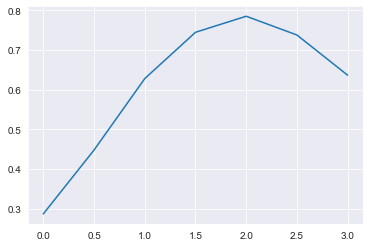

In [41]:
concentrations = []
speeds = []

# change this to include standard deviation as well
for s in range(0,31,5):
    speed = s/10
    U1 = sim(speed, 0, 2**12)
    print(speed)
    print(U1[-1,:,16])
    concentrations.append(U1[-1,24,16])
    speeds.append(speed)

plt.plot(speeds,concentrations)


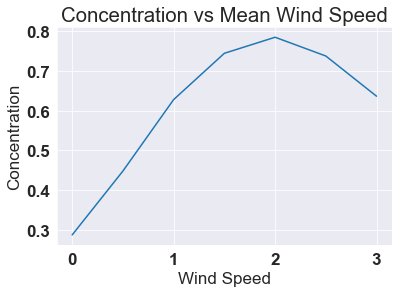

In [66]:
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 17}

matplotlib.rc('font', **font)

plt.xlabel('Wind Speed')
plt.ylabel('Concentration')
# - assuming variance of 2.168835495560843 with y_mean = 0
plt.title('Concentration vs Mean Wind Speed')
plt.plot(speeds,concentrations)
plt.savefig('conc_mws_x.pdf',bbox_inches='tight')


0.0
0.5
1.0
1.5
2.0
2.5
3.0


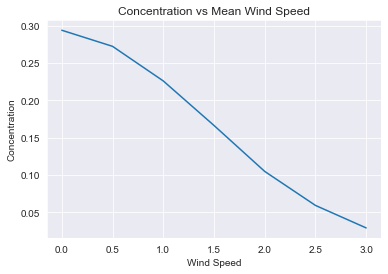

In [46]:
y_concentrations = []
y_speeds = []

# change this to include standard deviation as well
for s in range(0,31,5):
    speed = s/10
    U1 = sim(speed, 0, 2**12)
    print(speed)
    y_concentrations.append(U1[-1,16,24])
    y_speeds.append(speed)



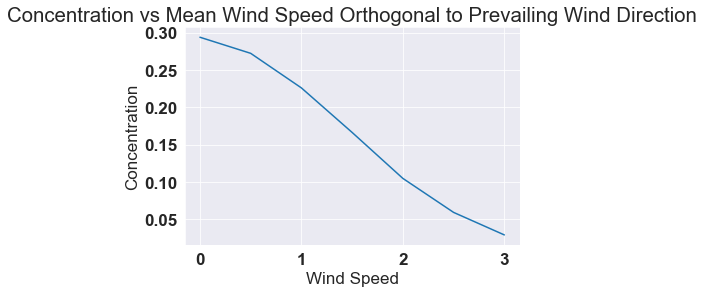

In [58]:
plt.xlabel('Wind Speed')
plt.ylabel('Concentration')
# - assuming variance of 2.168835495560843 with y_mean = 0
plt.title('Concentration vs Mean Wind Speed Orthogonal to Prevailing Wind Direction')
plt.plot(y_speeds, y_concentrations)
plt.savefig('conc_mws_y.pdf',bbox_inches='tight')

In [60]:
negx_concentrations = []
negx_speeds = []

# change this to include standard deviation as well
for s in range(0,31,5):
    speed = s/10
    U1 = sim(speed, 0, 2**12)
    print(speed)
    print(U1[-1,:,16])
    negx_concentrations.append(U1[-1,8,16])
    negx_speeds.append(speed)


0.0
[0.         0.01538093 0.03288813 0.05459472 0.08348091 0.12071177
 0.16816153 0.22626676 0.29590085 0.37585897 0.45836494 0.5462444
 0.62879096 0.70073681 0.76016283 0.79677254 0.80861747 0.79553852
 0.75679411 0.70167366 0.62867189 0.54568454 0.45652347 0.37279579
 0.29339365 0.22419053 0.16641677 0.11926218 0.08235062 0.05403347
 0.03224676 0.01550846 0.        ]
0.5
[0.         0.00559568 0.01270238 0.02299715 0.0372961  0.05713197
 0.08538807 0.12206608 0.16995777 0.22810616 0.29893203 0.37762875
 0.46386091 0.55227309 0.63519081 0.71056613 0.76831889 0.80455726
 0.81665867 0.80273767 0.76537445 0.70555743 0.63217496 0.5467235
 0.45818078 0.37353054 0.29588495 0.22713551 0.16619797 0.11537338
 0.07318082 0.0363424  0.        ]
1.0
[0.         0.00176892 0.00419893 0.00782958 0.01372761 0.02272398
 0.03564697 0.05468991 0.08048082 0.11529968 0.16250785 0.21967131
 0.28730808 0.36480856 0.44884461 0.53715745 0.61910257 0.69293758
 0.74776472 0.78302517 0.79448743 0.78037665 0.74

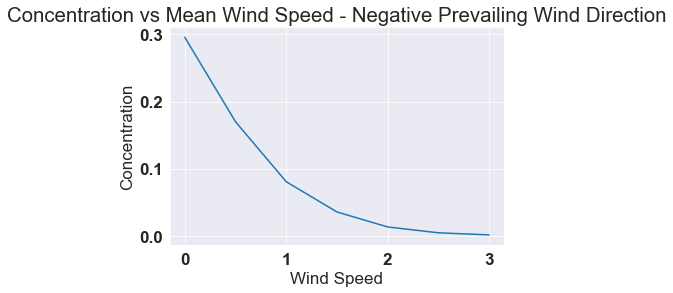

In [65]:

plt.xlabel('Wind Speed')
plt.ylabel('Concentration')
# - assuming variance of 2.168835495560843 with y_mean = 0
plt.title('Concentration vs Mean Wind Speed - Negative Prevailing Wind Direction')
plt.plot(negx_speeds, negx_concentrations)
plt.savefig('conc_mws_negx.pdf', bbox_inches='tight')

In [67]:
posx_100_concentrations = []
for s in range(0,100,1):
    U1 = sim(x_mean, y_mean, 2**12)
    posx_100_concentrations.append(U1[-1,24,16])


KeyboardInterrupt: 